# F1 Telemetry functions

## Import libraries

In [1]:
import fastf1
import matplotlib.pyplot as plt
import pandas as pd
from telemetry_utils import *

In [32]:
# Load a specific race session
session = fastf1.get_session(2024, 'Brazil', 'R')  # 'R' indicates the race; can also use 'Q', 'FP1', 'FP2', 'FP3'
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (573.13 MB) /home/michail/.cache/fastf1
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
cor

## Telemetry comparison between drivers for specific lap

In [ ]:
# Get telemetry data for a specific lap
lap = driver_laps.pick_fastest()  # Pick the fastest lap of the driver
telemetry = lap.get_telemetry()  # Get telemetry for that lap

# Access speed, throttle, brake, etc.
speed = telemetry['Speed']
throttle = telemetry['Throttle']
brake = telemetry['Brake']

In [2]:
# Load a specific race session
session = fastf1.get_session(2024, 'Brazil', 'R')  # 'R' indicates the race; can also use 'Q', 'FP1', 'FP2', 'FP3'
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (343.38 MB) /Users/mike/Library/Caches/fastf1
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messag

In [9]:
driver1 = session.laps.pick_drivers('HAM').pick_fastest()  # Pick fastest lap of driver 1
driver2 = session.laps.pick_drivers('LEC').pick_fastest()  # Pick fastest lap of driver 2

# Get telemetry for both drivers
telemetry_driver1 = driver1.get_telemetry()
telemetry_driver2 = driver2.get_telemetry()

# Plot a comparison (e.g., Speed)
# plt.plot(telemetry_driver1['Distance'], telemetry_driver1['Speed'], label='HAM')
# plt.plot(telemetry_driver2['Distance'], telemetry_driver2['Speed'], label='LEC')
# plt.xlabel('Distance (m)')
# plt.ylabel('Speed (km/h)')
# plt.title('Speed Comparison Between HAM and LEC')
# plt.legend()
# plt.show()


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [60]:
telemetry_driver1.columns

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')

**Available attributes**

['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z']

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


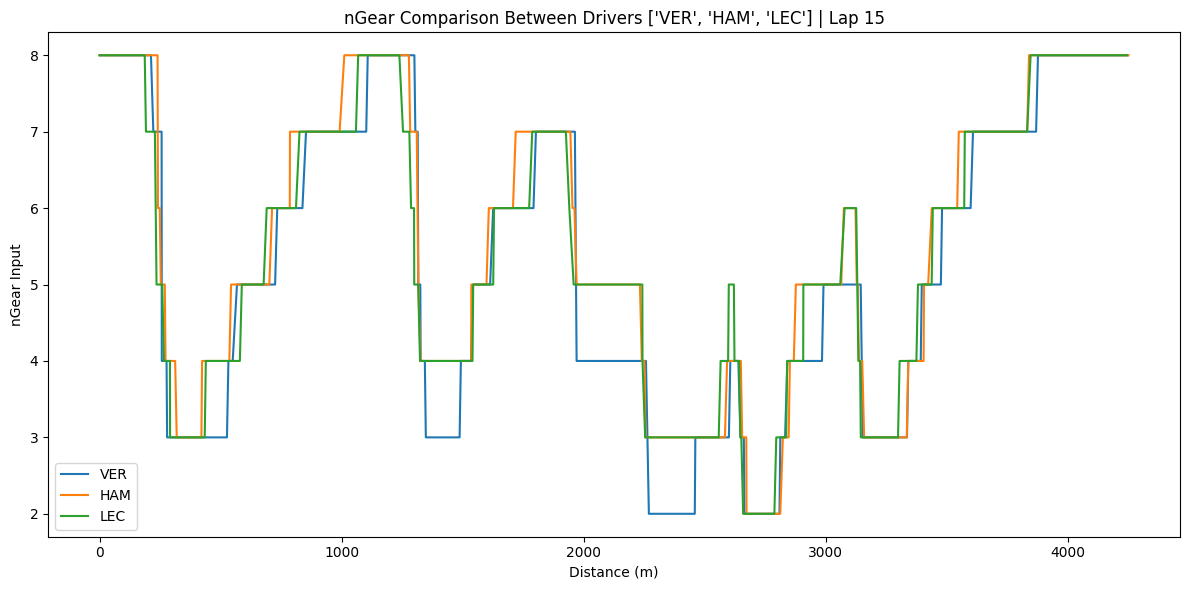

In [ ]:
telemetry_attr_comparison(session=session, drivers_abbrs=['VER', 'HAM', 'LEC'], attr='nGear', lap=15)

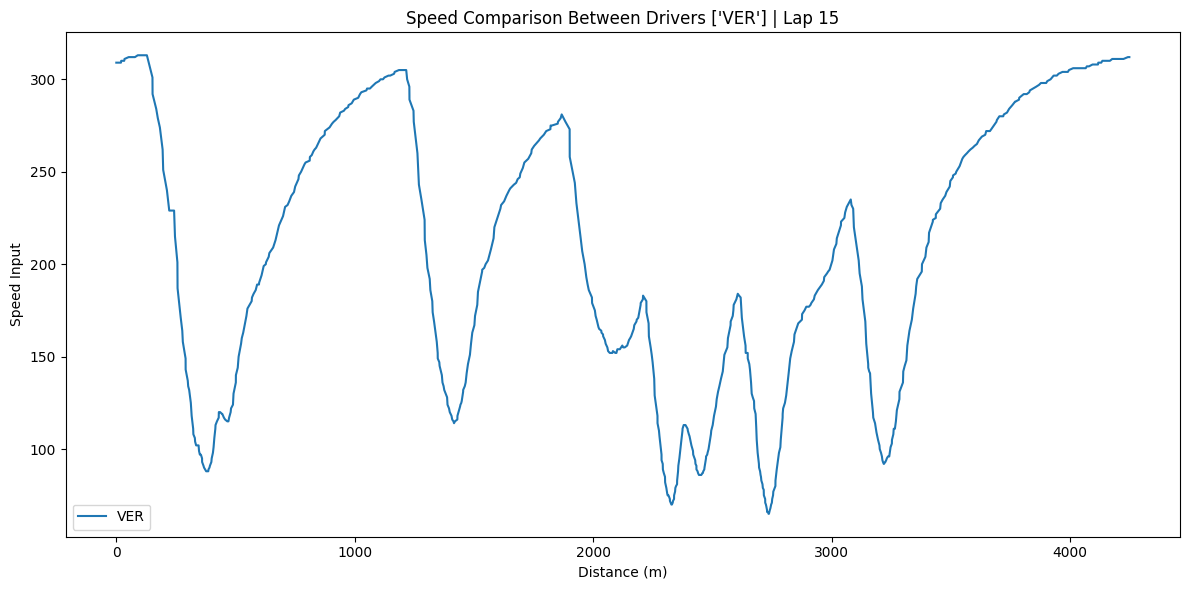

In [10]:
telemetry_attr_comparison(session=session, drivers_abbrs=['VER'], attr='Speed', lap=15)

## Lap times

In [55]:
import fastf1.plotting
import seaborn as sns
import pandas as pd

In [56]:
driver_laps = session.laps.pick_drivers("ALO").pick_quicklaps().reset_index()

In [60]:
sub_driver_laps = driver_laps.loc[:, ['LapNumber', 'LapTime']]
# sub_driver_laps['LapTime'] = sub_driver_laps['LapTime'] - pd.to_timedelta(sub_driver_laps['LapTime'].dt.days, unit='d')

In [65]:
driver_laps['Stint']

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    3.0
25    3.0
26    3.0
27    3.0
28    3.0
29    3.0
30    3.0
31    3.0
32    3.0
33    3.0
34    3.0
35    3.0
36    3.0
37    3.0
38    3.0
39    3.0
40    3.0
41    3.0
42    3.0
43    3.0
44    3.0
45    3.0
46    3.0
47    3.0
48    3.0
49    3.0
50    3.0
Name: Stint, dtype: float64

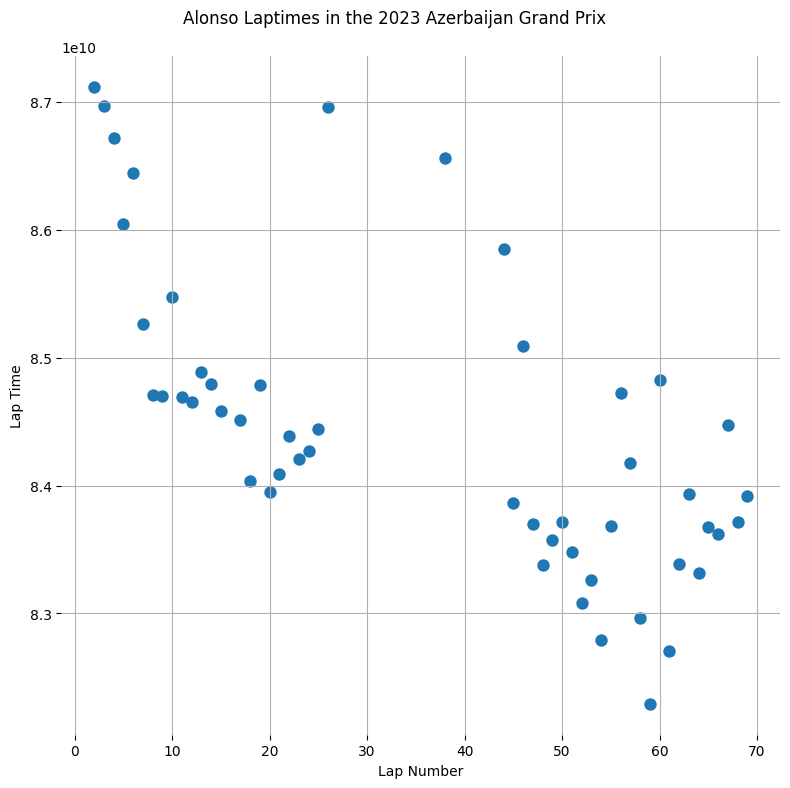

In [62]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=sub_driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                s=80,
                linewidth=0,
                legend='auto')


ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Alonso Laptimes in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [18]:
session = fastf1.get_session(2024, 'Sao Paulo Grand Prix', 'R')
session.load()
session.laps

events      WARNING 	Correcting user input 'Sao Paulo Grand Prix' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_mess

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:13:34.222000,VER,1,0 days 00:01:39.161000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:49.176000,...,True,Red Bull Racing,0 days 01:11:54.770000,2024-11-03 15:49:57.516,12,12.0,False,,False,False
1,0 days 01:15:01.356000,VER,1,0 days 00:01:27.134000,2.0,1.0,NaT,NaT,0 days 00:00:21.981000,0 days 00:00:46.412000,...,True,Red Bull Racing,0 days 01:13:34.222000,2024-11-03 15:51:36.968,1,10.0,False,,False,True
2,0 days 01:16:27.596000,VER,1,0 days 00:01:26.240000,3.0,1.0,NaT,NaT,0 days 00:00:21.716000,0 days 00:00:45.980000,...,True,Red Bull Racing,0 days 01:15:01.356000,2024-11-03 15:53:04.102,1,10.0,False,,False,True
3,0 days 01:17:54.298000,VER,1,0 days 00:01:26.702000,4.0,1.0,NaT,NaT,0 days 00:00:22.151000,0 days 00:00:46.150000,...,True,Red Bull Racing,0 days 01:16:27.596000,2024-11-03 15:54:30.342,12,10.0,False,,False,True
4,0 days 01:19:19.692000,VER,1,0 days 00:01:25.394000,5.0,1.0,NaT,NaT,0 days 00:00:21.773000,0 days 00:00:45.180000,...,True,Red Bull Racing,0 days 01:17:54.298000,2024-11-03 15:55:57.044,1,9.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0 days 03:13:57.033000,PIA,81,0 days 00:01:21.840000,65.0,3.0,NaT,NaT,0 days 00:00:20.784000,0 days 00:00:43.137000,...,False,McLaren,0 days 03:12:35.193000,2024-11-03 17:50:37.939,1,7.0,False,,False,True
1131,0 days 03:15:18.917000,PIA,81,0 days 00:01:21.884000,66.0,3.0,NaT,NaT,0 days 00:00:20.864000,0 days 00:00:43.215000,...,False,McLaren,0 days 03:13:57.033000,2024-11-03 17:51:59.779,1,7.0,False,,False,True
1132,0 days 03:16:41.203000,PIA,81,0 days 00:01:22.286000,67.0,3.0,NaT,NaT,0 days 00:00:21.336000,0 days 00:00:43.159000,...,False,McLaren,0 days 03:15:18.917000,2024-11-03 17:53:21.663,1,7.0,False,,False,True
1133,0 days 03:18:02.922000,PIA,81,0 days 00:01:21.719000,68.0,3.0,NaT,NaT,0 days 00:00:20.873000,0 days 00:00:42.918000,...,False,McLaren,0 days 03:16:41.203000,2024-11-03 17:54:43.949,1,7.0,False,,False,True


In [33]:
laps_df = session.laps

In [34]:
laps_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:13:34.222000,VER,1,0 days 00:01:39.161000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:49.176000,...,True,Red Bull Racing,0 days 01:11:54.770000,2024-11-03 15:49:57.516,12,12.0,False,,False,False
1,0 days 01:15:01.356000,VER,1,0 days 00:01:27.134000,2.0,1.0,NaT,NaT,0 days 00:00:21.981000,0 days 00:00:46.412000,...,True,Red Bull Racing,0 days 01:13:34.222000,2024-11-03 15:51:36.968,1,10.0,False,,False,True
2,0 days 01:16:27.596000,VER,1,0 days 00:01:26.240000,3.0,1.0,NaT,NaT,0 days 00:00:21.716000,0 days 00:00:45.980000,...,True,Red Bull Racing,0 days 01:15:01.356000,2024-11-03 15:53:04.102,1,10.0,False,,False,True
3,0 days 01:17:54.298000,VER,1,0 days 00:01:26.702000,4.0,1.0,NaT,NaT,0 days 00:00:22.151000,0 days 00:00:46.150000,...,True,Red Bull Racing,0 days 01:16:27.596000,2024-11-03 15:54:30.342,12,10.0,False,,False,True
4,0 days 01:19:19.692000,VER,1,0 days 00:01:25.394000,5.0,1.0,NaT,NaT,0 days 00:00:21.773000,0 days 00:00:45.180000,...,True,Red Bull Racing,0 days 01:17:54.298000,2024-11-03 15:55:57.044,1,9.0,False,,False,True


In [35]:
laps_df.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [36]:
laps_df.loc[:, ['Driver', 'LapTime', 'LapNumber', 'Stint', 'Compound']].head()

,Driver,LapTime,LapNumber,Stint,Compound
0,VER,0 days 00:01:39.161000,1.0,1.0,INTERMEDIATE
1,VER,0 days 00:01:27.134000,2.0,1.0,INTERMEDIATE
2,VER,0 days 00:01:26.240000,3.0,1.0,INTERMEDIATE
3,VER,0 days 00:01:26.702000,4.0,1.0,INTERMEDIATE
4,VER,0 days 00:01:25.394000,5.0,1.0,INTERMEDIATE


## Weather

In [37]:
weather_data = session.laps.get_weather_data()

In [40]:
weather_data.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:22.903000,22.2,86.0,927.4,True,27.3,0,0.4
1,0 days 00:01:22.903000,22.3,87.0,927.3,True,26.2,191,0.0
2,0 days 00:02:22.903000,22.1,86.0,927.4,True,26.4,182,0.8
3,0 days 00:03:22.906000,22.1,87.0,927.4,True,26.4,210,0.5
4,0 days 00:04:22.910000,22.1,87.0,927.3,True,26.2,0,0.4


In [39]:
weather_data = session.weather_data  # Access weather data for the session
weather_data.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:22.903000,22.2,86.0,927.4,True,27.3,0,0.4
1,0 days 00:01:22.903000,22.3,87.0,927.3,True,26.2,191,0.0
2,0 days 00:02:22.903000,22.1,86.0,927.4,True,26.4,182,0.8
3,0 days 00:03:22.906000,22.1,87.0,927.4,True,26.4,210,0.5
4,0 days 00:04:22.910000,22.1,87.0,927.3,True,26.2,0,0.4


## Results

In [4]:
results_df = pd.read_csv('data/gps_2024_season_results.csv')
results_df.head()

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,EventName
0,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,1.0,1,1.0,NaN,NaN,NaN,0 days 01:40:52.571000,Finished,25.0,Pre-Season Testing
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,2.0,2,2.0,NaN,NaN,NaN,0 days 00:00:20.945000,Finished,18.0,Pre-Season Testing
2,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,3.0,3,5.0,NaN,NaN,NaN,0 days 00:00:41.823000,Finished,15.0,Pre-Season Testing
3,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,4.0,4,4.0,NaN,NaN,NaN,0 days 00:01:01.040000,Finished,12.0,Pre-Season Testing
4,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,5.0,5,9.0,NaN,NaN,NaN,0 days 00:01:02.430000,Finished,10.0,Pre-Season Testing


In [5]:
results_df.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points',
       'EventName'],
      dtype='object')

In [6]:
results_df = results_df[['Abbreviation', 'ClassifiedPosition', 'GridPosition', 'Status', 'EventName']]
results_df = results_df[results_df['EventName'] != 'Pre-Season Testing']
results_df.head()

,Abbreviation,ClassifiedPosition,GridPosition,Status,EventName
20,VER,1,1.0,Finished,Bahrain Grand Prix
21,PER,2,5.0,Finished,Bahrain Grand Prix
22,SAI,3,4.0,Finished,Bahrain Grand Prix
23,LEC,4,2.0,Finished,Bahrain Grand Prix
24,RUS,5,3.0,Finished,Bahrain Grand Prix


### Qualifying

In [36]:
# #If I just input quali_df = results_df, I will find the 1st place grid positions, not pole positions
# quali_df = results_df.copy()

In [37]:
quali_df = pd.read_csv('data/gps_2024_season_quali.csv')

In [38]:
quali_df = quali_df[['Abbreviation', 'Position', 'EventName']]
quali_df = quali_df[quali_df['EventName'] != 'Pre-Season Testing']
quali_df = quali_df.rename(columns={'Abbreviation': 'Driver'})
quali_df.head()

,Driver,Position,EventName
20,VER,1.0,Bahrain Grand Prix
21,LEC,2.0,Bahrain Grand Prix
22,RUS,3.0,Bahrain Grand Prix
23,SAI,4.0,Bahrain Grand Prix
24,PER,5.0,Bahrain Grand Prix


#### Qualifying performance

In [39]:
quali_per_df = quali_df.copy()
quali_per_df.sample(5)

,Driver,Position,EventName
420,RUS,2.0,São Paulo Grand Prix
373,OCO,15.0,Singapore Grand Prix
157,ALO,19.0,Emilia Romagna Grand Prix
58,SAR,19.0,Saudi Arabian Grand Prix
326,PER,8.0,Italian Grand Prix


In [88]:
driver_list = ['NOR', 'PIA']
quali_per_df = quali_per_df[quali_per_df['Driver'].isin(driver_list)]
quali_per_df.head()

,Driver,Position,EventName
26,NOR,7.0,Bahrain Grand Prix
27,PIA,8.0,Bahrain Grand Prix
44,PIA,5.0,Saudi Arabian Grand Prix
45,NOR,6.0,Saudi Arabian Grand Prix
63,NOR,4.0,Australian Grand Prix


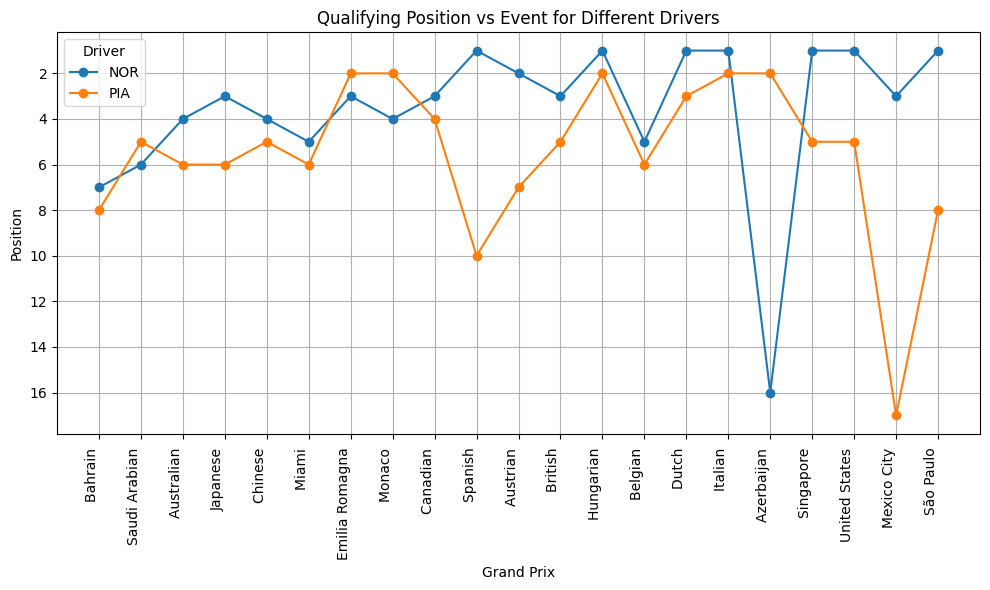

In [89]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
plt.figure(figsize=(10, 6))

# # Group by 'driver' and plot each driver's data
# for driver, data in quali_per_df.groupby('Driver'):
#     short_event = data['EventName'].apply(lambda x: x.replace('Grand Prix', ''))
#     plt.plot(short_event, data['Position'], label=driver)

# Adding markers to the plot
for driver, data in quali_per_df.groupby('Driver'):
    short_event = data['EventName'].apply(lambda x: x.replace('Grand Prix', ''))
    plt.plot(short_event, data['Position'], label=driver, marker='o')


# Adding labels and legend
plt.xlabel('Grand Prix')
plt.ylabel('Position')
plt.title(f'Qualifying Position vs Event for Different Drivers')
plt.legend(title='Driver')
plt.gca().invert_yaxis()  # Optional: Reverse y-axis so 1st position is at the top
plt.xticks(rotation=90, ha='right')  # Adjust rotation angle as needed
plt.tight_layout()  # Automatically adjust padding
plt.grid()
plt.show()


The pivot function in pandas is used to reshape the DataFrame, essentially transforming or "pivoting" the data such that unique values from one column become new columns, while other columns are used as row indices.

In [90]:
# Pivot the DataFrame for easier comparison by EventName
pivoted = quali_per_df.pivot(index='EventName', columns='Driver', values='Position')

In [91]:
pivoted.head()

Driver,NOR,PIA
EventName,,
Australian Grand Prix,4.0,6.0
Austrian Grand Prix,2.0,7.0
Azerbaijan Grand Prix,16.0,2.0
Bahrain Grand Prix,7.0,8.0
Belgian Grand Prix,5.0,6.0


In [93]:
# Add a column to indicate which driver has the lower position
pivoted['BetterDriver'] = pivoted.idxmin(axis=1)  # Find the driver with the minimum position

In [98]:
outquali_df = pd.DataFrame(pivoted['BetterDriver'].value_counts())
outquali_df = outquali_df.reset_index()
outquali_df

,BetterDriver,count
0,NOR,17
1,PIA,4


In [102]:
better_driver = outquali_df.loc[outquali_df['count'].idxmax(), 'BetterDriver']
better_driver

'NOR'

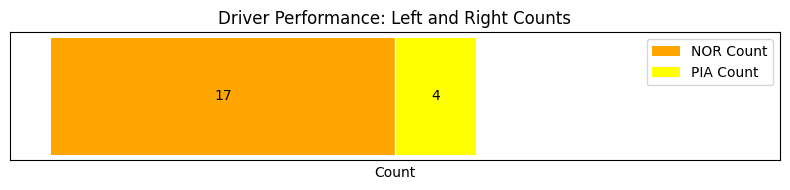

In [121]:
drivers, counts = outquali_df['BetterDriver'], outquali_df['count']

# Set the figure size for better spacing
plt.figure(figsize=(8, 2))

# Plot left bar for NOR (negative value to extend left), with smaller width (height)
plt.barh(0, -counts[0], color='orange', label=f'{drivers[0]} Count', align='center')
# Plot right bar for PIA (positive value to extend right), with smaller width (height)
plt.barh(0, counts[1], color='yellow', label=f'{drivers[1]} Count', align='center')

# Add labels and title
plt.xlabel('Count')
plt.title('Driver Performance: Left and Right Counts')

# Add a vertical line at center (for visual separation)
plt.axvline(0, color='white', linewidth=1)

# Add the legend to differentiate the bars
plt.legend()

# Remove y-axis ticks (since we have only one row)
plt.yticks([])

# Remove x-axis ticks
plt.xticks([])

# Adjust the x-axis limits to give some space around the bars
plt.xlim(-max(counts)-2, max(counts)+2)

# Place the count values inside the bars
# For the left bar
plt.text(-counts[0]/2, 0, str(counts[0]), color='black', ha='center', va='center')
# For the right bar
plt.text(counts[1]/2, 0, str(counts[1]), color='black', ha='center', va='center')

# Show plot
plt.tight_layout()
plt.show()

Extend this by:
 - Having specific color for each driver (need to think for global solution, that is other plots)
 - Making it for multiple teams (pairs of drivers)

#### Highest number of pole positions this season?

In [ ]:
pol_df = quali_df.copy()
pol_df = pol_df[pol_df['Position'] == 1]
pol_df.sample(5)

,Driver,Position,EventName
419,NOR,1.0,São Paulo Grand Prix
20,VER,1.0,Bahrain Grand Prix
219,VER,1.0,Austrian Grand Prix
259,NOR,1.0,Hungarian Grand Prix
299,NOR,1.0,Dutch Grand Prix


In [5]:
pol_df['Driver'].value_counts()

Driver
VER    9
NOR    7
LEC    2
RUS    2
SAI    1
Name: count, dtype: int64

In [188]:
pol_df['Driver'].value_counts().idxmax()

'VER'

## Positions

### Positions gained

In [12]:
pos_gain_df = results_df.copy()
pos_gain_df = pos_gain_df.rename(columns={'Abbreviation': 'Driver'})

In [13]:
pos_gain_df.head()


,Driver,ClassifiedPosition,GridPosition,Status,EventName
20,VER,1,1.0,Finished,Bahrain Grand Prix
21,PER,2,5.0,Finished,Bahrain Grand Prix
22,SAI,3,4.0,Finished,Bahrain Grand Prix
23,LEC,4,2.0,Finished,Bahrain Grand Prix
24,RUS,5,3.0,Finished,Bahrain Grand Prix


In [27]:
def calculate_positions(row):
    try:
        # Try converting the value to a float
        classified_position = float(row['ClassifiedPosition'])
        return row['GridPosition'] - classified_position
    except ValueError:
        # If conversion fails, return the original value
        return row['ClassifiedPosition']

In [28]:
# Apply the function row-wise
pos_gain_df['GainedPositions'] = pos_gain_df.apply(calculate_positions, axis=1)

In [29]:
pos_gain_df

,Driver,ClassifiedPosition,GridPosition,Status,EventName,GainedPositions
20,VER,1,1.0,Finished,Bahrain Grand Prix,0.0
21,PER,2,5.0,Finished,Bahrain Grand Prix,3.0
22,SAI,3,4.0,Finished,Bahrain Grand Prix,1.0
23,LEC,4,2.0,Finished,Bahrain Grand Prix,-2.0
24,RUS,5,3.0,Finished,Bahrain Grand Prix,-2.0
...,...,...,...,...,...,...
434,SAI,R,0.0,Accident,São Paulo Grand Prix,R
435,COL,R,16.0,Accident,São Paulo Grand Prix,R
436,ALB,W,7.0,Withdrew,São Paulo Grand Prix,W
437,STR,W,10.0,Withdrew,São Paulo Grand Prix,W


Input function for specific driver and grand prix and return gained positions. Might also have to define more what the R, W, D mean and what the program should output when finding those.

### Positions during the race

In [ ]:
pos_df = pd.read_csv("data/gps_2024_season_laps.csv")
pos_df = pos_df[['Driver', 'LapNumber', 'Stint', 'Position', 'EventName']]
pos_df = pos_df[pos_df['EventName'] != 'Pre-Season Testing']
pos_df.head()

,Driver,LapNumber,Stint,Position,EventName
1177,VER,1.0,1.0,1.0,Bahrain Grand Prix
1178,VER,2.0,1.0,1.0,Bahrain Grand Prix
1179,VER,3.0,1.0,1.0,Bahrain Grand Prix
1180,VER,4.0,1.0,1.0,Bahrain Grand Prix
1181,VER,5.0,1.0,1.0,Bahrain Grand Prix


In [64]:
# pos_df[(pos_df['Driver'] == 'BOT') & (pos_df['EventName'] == 'Bahrain Grand Prix')]

In [70]:
event_name = 'Bahrain Grand Prix'
pos_df = pos_df[pos_df['EventName'] == event_name]

In [71]:
# pos_df = pos_df[pos_df['Driver'] == 'VER']
# pos_df.head()

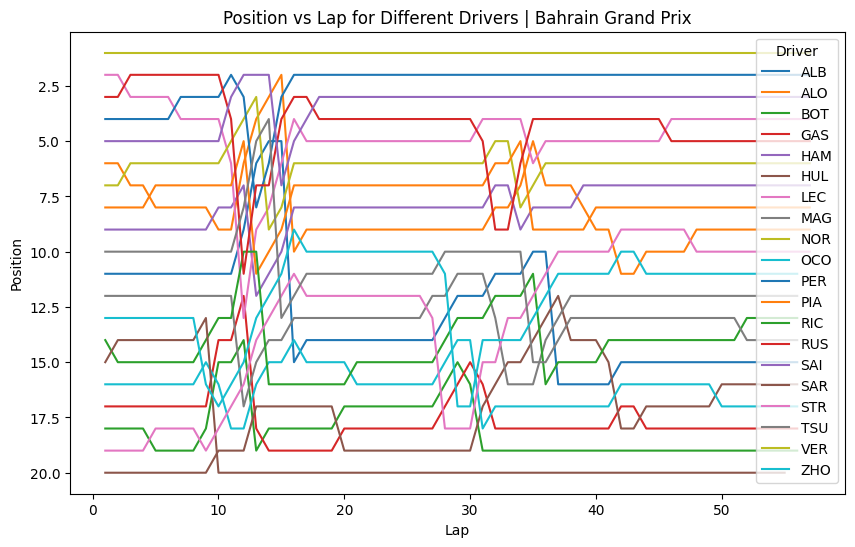

In [72]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
plt.figure(figsize=(10, 6))

# Group by 'driver' and plot each driver's data
for driver, data in pos_df.groupby('Driver'):
    plt.plot(data['LapNumber'], data['Position'], label=driver)

# Adding labels and legend
plt.xlabel('Lap')
plt.ylabel('Position')
plt.title(f'Position vs Lap for Different Drivers | {event_name}')
plt.legend(title='Driver')
plt.gca().invert_yaxis()  # Optional: Reverse y-axis so 1st position is at the top
plt.show()


Could add another column for team for easier plot-information retrieval

Also add specific colors depending on driver-team (e.g. dark blue and blue for red bull)

### Driver lead throughout race

In [92]:
pos_df = pd.read_csv("data/gps_2024_season_laps.csv")
pos_df = pos_df[['Driver', 'LapNumber', 'Stint', 'Position', 'EventName']]
pos_df = pos_df[pos_df['EventName'] != 'Pre-Season Testing']
pos_df.head()

,Driver,LapNumber,Stint,Position,EventName
1177,VER,1.0,1.0,1.0,Bahrain Grand Prix
1178,VER,2.0,1.0,1.0,Bahrain Grand Prix
1179,VER,3.0,1.0,1.0,Bahrain Grand Prix
1180,VER,4.0,1.0,1.0,Bahrain Grand Prix
1181,VER,5.0,1.0,1.0,Bahrain Grand Prix


In [93]:
event_name = 'Dutch Grand Prix'
pos_df = pos_df[pos_df['EventName'] == event_name]

In [100]:
# pd.DataFrame(pos_df[['Position', 'Driver']].value_counts())

In [101]:
lead_df = pd.DataFrame(pos_df[pos_df['Position'] == 1]['Driver'].value_counts())

In [102]:
lead_df

,count
Driver,
NOR,51
VER,17
PIA,4


In [103]:
# Assuming your DataFrame is named df
max_driver = lead_df['count'].idxmax()

# Print the result
print(f"Driver with the maximum count: {max_driver}")

Driver with the maximum count: NOR


Could make it more informative (e.g. pie chart for amount of laps led??)

Could also extend for season-multiple grand pri

## Overtakes

In [7]:
# # Here is the distinction if we want for one race otherwise for the whole season
# pos_df = pos_df[pos_df['EventName'] == 'Dutch Grand Prix']

In [16]:
over_df = pd.DataFrame()

events = pos_df['EventName'].unique()
drivers = pos_df['Driver'].unique()

over_df['Driver'] = drivers
over_df[events] = 0

In [17]:
over_df.head()

,Driver,Bahrain Grand Prix,Saudi Arabian Grand Prix,Australian Grand Prix,Japanese Grand Prix,Chinese Grand Prix,Miami Grand Prix,Emilia Romagna Grand Prix,Monaco Grand Prix,Canadian Grand Prix,...,British Grand Prix,Hungarian Grand Prix,Belgian Grand Prix,Dutch Grand Prix,Italian Grand Prix,Azerbaijan Grand Prix,Singapore Grand Prix,United States Grand Prix,Mexico City Grand Prix,São Paulo Grand Prix
0,VER,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PER,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SAI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LEC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,RUS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Driver overtakes

In [18]:
# Iterate over the DataFrame grouped by each driver
for event in events:
    event_pos_df = pos_df[pos_df['EventName'] == event]

    for driver, group in event_pos_df.groupby('Driver'):
        # Sort by 'LapNumber' to ensure proper order
        group = group.sort_values(by='LapNumber')
        
        # Calculate when an overtake happens (position decrease)
        event_pos_df.loc[group.index, event] = (group['Position'].shift(1) > group['Position']).astype(int)

    # To find the total number of overtakes by each driver
    overtakes_per_driver = event_pos_df.groupby('Driver')[event].sum()

    # Add the new event column to over_df with values mapped from overtakes_per_driver
    over_df[event] = over_df['Driver'].map(overtakes_per_driver)

    # Replace any NaN values with 0 (if a driver doesn't appear in overtakes_per_driver)
    over_df[event] = over_df[event].fillna(0).astype(int)

/var/folders/9c/9pfxvdg55z52zckw2xcljktm0000gn/T/ipykernel_3268/3729388877.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_pos_df.loc[group.index, event] = (group['Position'].shift(1) > group['Position']).astype(int)
/var/folders/9c/9pfxvdg55z52zckw2xcljktm0000gn/T/ipykernel_3268/3729388877.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_pos_df.loc[group.index, event] = (group['Position'].shift(1) > group['Position']).astype(int)
/var/folders/9c/9pfxvdg55z52zckw2xcljktm0000gn/T/ipykern

In [19]:
over_df.head()

,Driver,Bahrain Grand Prix,Saudi Arabian Grand Prix,Australian Grand Prix,Japanese Grand Prix,Chinese Grand Prix,Miami Grand Prix,Emilia Romagna Grand Prix,Monaco Grand Prix,Canadian Grand Prix,...,British Grand Prix,Hungarian Grand Prix,Belgian Grand Prix,Dutch Grand Prix,Italian Grand Prix,Azerbaijan Grand Prix,Singapore Grand Prix,United States Grand Prix,Mexico City Grand Prix,São Paulo Grand Prix
0,VER,0,1,0,2,2,1,3,1,3,...,5,7,9,3,7,5,1,2,8,9
1,PER,5,3,10,8,6,4,9,0,8,...,8,14,3,6,9,3,4,6,6,8
2,SAI,5,0,1,10,8,3,3,1,9,...,4,9,8,9,7,5,9,3,2,6
3,LEC,7,2,7,9,5,2,3,0,2,...,5,7,7,5,5,1,6,2,2,7
4,RUS,6,3,8,14,6,7,4,1,4,...,2,11,8,4,13,7,4,14,5,2


In [20]:
over_df['DriverTotalOvertakes'] = over_df[over_df.columns[1:]].sum(axis=1)

In [22]:
over_df.tail()

,Driver,Bahrain Grand Prix,Saudi Arabian Grand Prix,Australian Grand Prix,Japanese Grand Prix,Chinese Grand Prix,Miami Grand Prix,Emilia Romagna Grand Prix,Monaco Grand Prix,Canadian Grand Prix,...,Hungarian Grand Prix,Belgian Grand Prix,Dutch Grand Prix,Italian Grand Prix,Azerbaijan Grand Prix,Singapore Grand Prix,United States Grand Prix,Mexico City Grand Prix,São Paulo Grand Prix,DriverTotalOvertakes
18,BOT,7,2,8,10,5,5,6,5,7,...,11,11,5,10,5,8,7,11,7,157
19,SAR,2,3,0,9,12,2,8,4,1,...,10,7,6,0,0,0,0,0,0,81
20,BEA,0,7,0,0,0,0,0,0,0,...,0,0,0,0,8,0,0,0,12,27
21,COL,0,0,0,0,0,0,0,0,0,...,0,0,0,10,7,5,10,11,2,45
22,LAW,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,12,5,27


In [23]:
over_df[over_df.columns[1:]].sum(axis=0)

Bahrain Grand Prix            153
Saudi Arabian Grand Prix       51
Australian Grand Prix         145
Japanese Grand Prix           136
Chinese Grand Prix            185
Miami Grand Prix              107
Emilia Romagna Grand Prix     116
Monaco Grand Prix              30
Canadian Grand Prix           119
Spanish Grand Prix            204
Austrian Grand Prix           171
British Grand Prix             96
Hungarian Grand Prix          183
Belgian Grand Prix            171
Dutch Grand Prix              129
Italian Grand Prix            164
Azerbaijan Grand Prix         116
Singapore Grand Prix          114
United States Grand Prix      132
Mexico City Grand Prix        134
São Paulo Grand Prix           98
DriverTotalOvertakes         2754
dtype: int64

Input for function for specific driver/grand prix and output what needed

## Exploration

In [68]:
session = fastf1.get_session(2024, 'Sao Paulo Grand Prix', 'R')
session.load()
session.laps

events      WARNING 	Correcting user input 'Sao Paulo Grand Prix' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_mess

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:13:34.222000,VER,1,0 days 00:01:39.161000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:49.176000,...,True,Red Bull Racing,0 days 01:11:54.770000,2024-11-03 15:49:57.516,12,12.0,False,,False,False
1,0 days 01:15:01.356000,VER,1,0 days 00:01:27.134000,2.0,1.0,NaT,NaT,0 days 00:00:21.981000,0 days 00:00:46.412000,...,True,Red Bull Racing,0 days 01:13:34.222000,2024-11-03 15:51:36.968,1,10.0,False,,False,True
2,0 days 01:16:27.596000,VER,1,0 days 00:01:26.240000,3.0,1.0,NaT,NaT,0 days 00:00:21.716000,0 days 00:00:45.980000,...,True,Red Bull Racing,0 days 01:15:01.356000,2024-11-03 15:53:04.102,1,10.0,False,,False,True
3,0 days 01:17:54.298000,VER,1,0 days 00:01:26.702000,4.0,1.0,NaT,NaT,0 days 00:00:22.151000,0 days 00:00:46.150000,...,True,Red Bull Racing,0 days 01:16:27.596000,2024-11-03 15:54:30.342,12,10.0,False,,False,True
4,0 days 01:19:19.692000,VER,1,0 days 00:01:25.394000,5.0,1.0,NaT,NaT,0 days 00:00:21.773000,0 days 00:00:45.180000,...,True,Red Bull Racing,0 days 01:17:54.298000,2024-11-03 15:55:57.044,1,9.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0 days 03:13:57.033000,PIA,81,0 days 00:01:21.840000,65.0,3.0,NaT,NaT,0 days 00:00:20.784000,0 days 00:00:43.137000,...,False,McLaren,0 days 03:12:35.193000,2024-11-03 17:50:37.939,1,7.0,False,,False,True
1131,0 days 03:15:18.917000,PIA,81,0 days 00:01:21.884000,66.0,3.0,NaT,NaT,0 days 00:00:20.864000,0 days 00:00:43.215000,...,False,McLaren,0 days 03:13:57.033000,2024-11-03 17:51:59.779,1,7.0,False,,False,True
1132,0 days 03:16:41.203000,PIA,81,0 days 00:01:22.286000,67.0,3.0,NaT,NaT,0 days 00:00:21.336000,0 days 00:00:43.159000,...,False,McLaren,0 days 03:15:18.917000,2024-11-03 17:53:21.663,1,7.0,False,,False,True
1133,0 days 03:18:02.922000,PIA,81,0 days 00:01:21.719000,68.0,3.0,NaT,NaT,0 days 00:00:20.873000,0 days 00:00:42.918000,...,False,McLaren,0 days 03:16:41.203000,2024-11-03 17:54:43.949,1,7.0,False,,False,True


In [ ]:
session.car_data

fastest_lap = session.laps.pick_fastest()
car_data = fastest_lap.get_car_data().add_distance()

session.track_status.head()

session.total_laps

len(session.drivers) * session.total_laps # is larger since not all drivers did all laps


laps = session.laps  # Get all laps completed in the session
driver_laps = session.laps.pick_drivers(['VER'])  # Get laps for a specific driver (e.g., 'VER' for Max Verstappen)


max(driver_laps['LapNumber']) # completed all laps

In [75]:
results_df = session.results
results_df.head()

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,1,17.0,NaT,NaT,NaT,0 days 02:06:54.430000,Finished,26.0
31,31,E OCON,OCO,ocon,Alpine,0093cc,alpine,Esteban,Ocon,Esteban Ocon,...,FRA,2.0,2,4.0,NaT,NaT,NaT,0 days 00:00:19.477000,Finished,18.0
10,10,P GASLY,GAS,gasly,Alpine,0093cc,alpine,Pierre,Gasly,Pierre Gasly,...,FRA,3.0,3,13.0,NaT,NaT,NaT,0 days 00:00:22.532000,Finished,15.0
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,GBR,4.0,4,2.0,NaT,NaT,NaT,0 days 00:00:23.265000,Finished,12.0
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,5.0,5,6.0,NaT,NaT,NaT,0 days 00:00:30.177000,Finished,10.0


In [73]:
results_df.head().T

,1,31,10,63,16
DriverNumber,1,31,10,63,16
BroadcastName,M VERSTAPPEN,E OCON,P GASLY,G RUSSELL,C LECLERC
Abbreviation,VER,OCO,GAS,RUS,LEC
DriverId,max_verstappen,ocon,gasly,russell,leclerc
TeamName,Red Bull Racing,Alpine,Alpine,Mercedes,Ferrari
TeamColor,3671C6,0093cc,0093cc,27F4D2,E80020
TeamId,red_bull,alpine,alpine,mercedes,ferrari
FirstName,Max,Esteban,Pierre,George,Charles
LastName,Verstappen,Ocon,Gasly,Russell,Leclerc
FullName,Max Verstappen,Esteban Ocon,Pierre Gasly,George Russell,Charles Leclerc


In [71]:
results_df.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points'],
      dtype='object')